In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_df=pd.read_csv("heart.csv")


/home/u213911/tmp/ipykernel_2180474/1402544597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_df.isnull().sum()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [3]:
#2. distribution of target variable.
data_df['target'] = np.where(data_df['target']!= 0, 1, 0)

data_df['target'] = data_df['target'].astype('category')


data_df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    object  
 2   dataset   920 non-null    object  
 3   cp        920 non-null    object  
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    object  
 7   restecg   918 non-null    object  
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    object  
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    object  
 12  ca        309 non-null    float64 
 13  thal      434 non-null    object  
 14  target    920 non-null    category
dtypes: category(1), float64(5), int64(1), object(8)
memory usage: 101.8+ KB


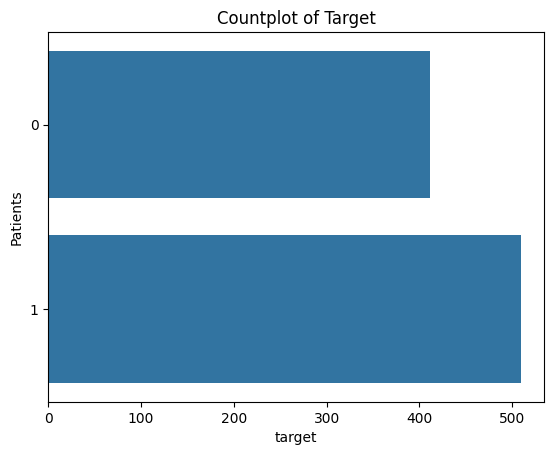

In [5]:
sns.countplot(data_df['target'])
# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

Let us proceed by splitting our training and test data and our input and target variables. Since we are using KNN, it is mandatory to scale our datasets too.

In [6]:
# Create a list of categorical columns and numerical columns
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset']

num_cols = ['age','trestbps','chol','thalch','oldpeak']


In [7]:
df_continuous = data_df[num_cols]
df_continuous.fillna(0, inplace=True)

/home/u213911/tmp/ipykernel_2180474/1546792749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.fillna(0, inplace=True)


In [8]:
# creating a Knn model
y = data_df["target"].values
x = df_continuous

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


The intuition behind choosing the best value of k is beyond the scope of this article, but we should know that we can determine the optimum value of k when we get the highest test score for that value. For that, we can evaluate the training and testing scores for up to 20 nearest neighbors:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)

    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To evaluate the max test score and the k values associated with it, run the following command:

In [10]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 75.72463768115942 and k = [16]


Thus, we have obtained the optimum value of k to be 3, 11, or 20 with a score of 83.5. We will finalize one of these values and fit the model accordingly:

In [11]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(14)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7463768115942029

Now, how do we evaluate whether this model is a ‘good’ model or not? For that, we use something called a Confusion Matrix:

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,85,37,122
1,33,121,154
All,118,158,276


In [13]:
cm

array([[ 85,  37],
       [ 33, 121]])

In [14]:
acc=np.sum(np.diag(cm))/np.sum(cm)
prec=cm[0,0]/(cm[0,0]+cm[1,0])
recal=cm[0,0]/(cm[0,0]+cm[0,1])
fscore=2*(prec*recal)/(prec+recal)


In [15]:
print("Accuracy:", acc)
print("Precision: ",prec)
print("Recall: ",recal)
print("f1-score: ",fscore)

Accuracy: 0.7463768115942029
Precision:  0.7203389830508474
Recall:  0.6967213114754098
f1-score:  0.7083333333333333


All these measures in single function:

In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71       122
           1       0.77      0.79      0.78       154

    accuracy                           0.75       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276



In [17]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [18]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.3f' % auc)

AUC: 0.802


In [19]:
from sklearn.metrics import RocCurveDisplay

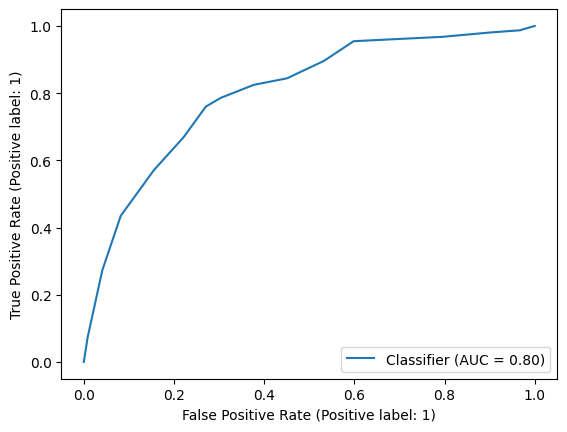

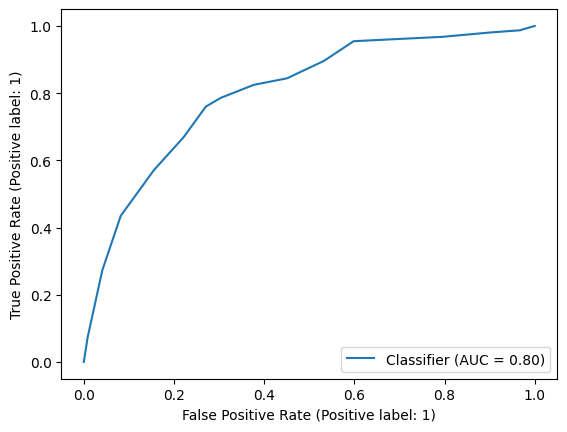

In [20]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Plot the ROC curve
roc_curve_display.plot()

# Model to logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [22]:
# creating a Knn model
y = data_df["target"].values
x = df_continuous

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7246376811594203
Precision: 0.7039473684210527
Recall: 0.7753623188405797


In [27]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

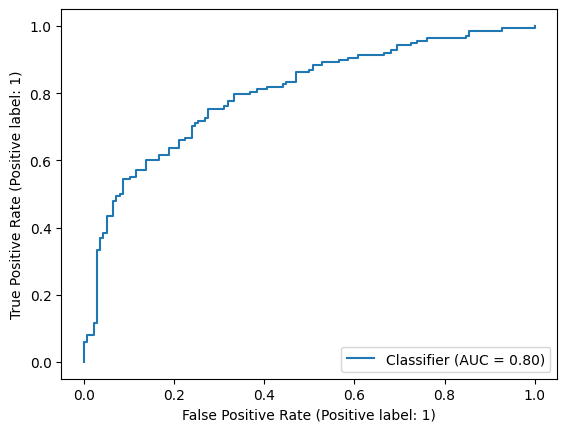

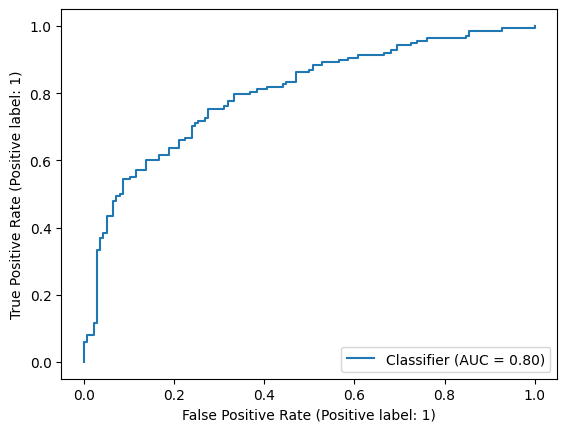

In [28]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Plot the ROC curve
roc_curve_display.plot()

# 3.Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [30]:
# Create a Decision Tree Classifier with the "entropy" criterion
model = DecisionTreeClassifier(criterion="entropy")

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred = model.predict(X_test)

In [33]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9984
Test set score: 0.6848


In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train))

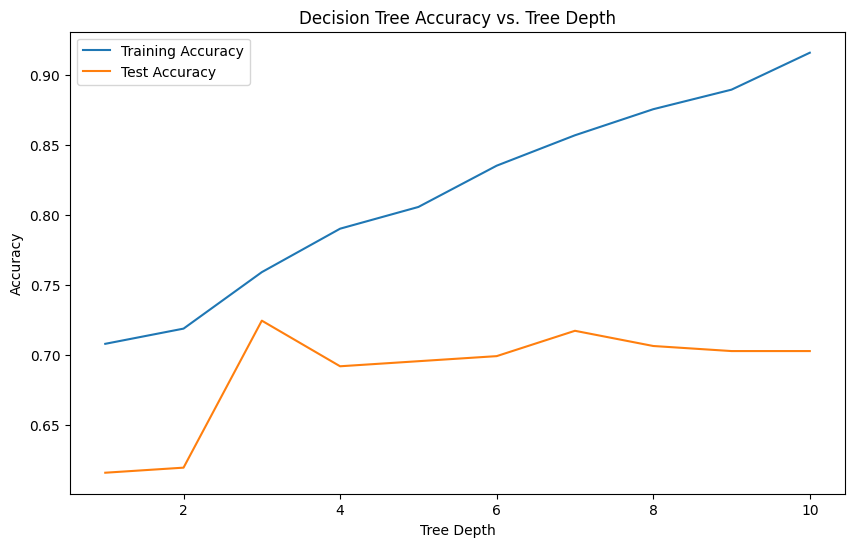

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Test different tree depths
depths = np.arange(1, 11)
for depth in depths:
    # Create a Decision Tree Classifier with the specified depth
    model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

    # Train the classifier on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store accuracy values
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label="Training Accuracy")
plt.plot(depths, test_accuracy, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Tree Depth")
plt.legend()
plt.show()

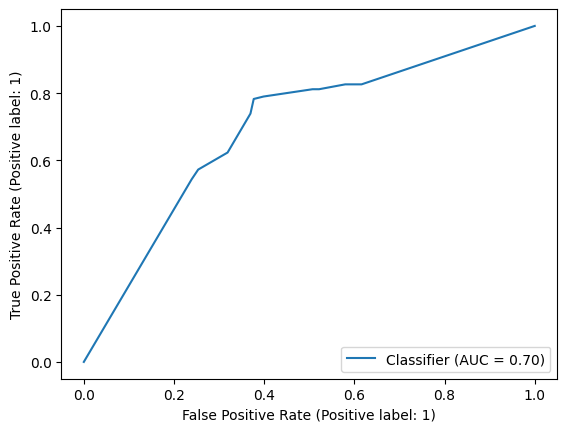

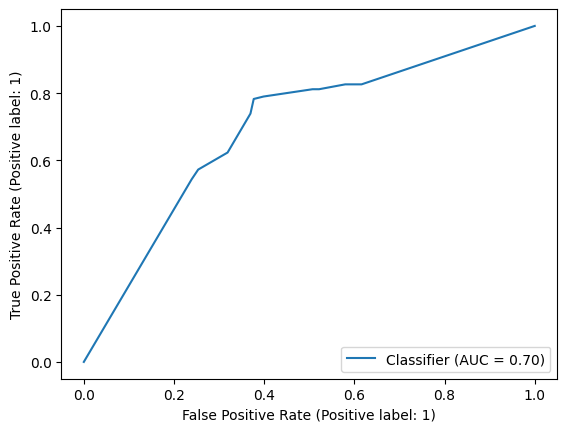

In [42]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Plot the ROC curve
roc_curve_display.plot()

# 4.SVM

In [43]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear',probability = True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


AUC: 0.798


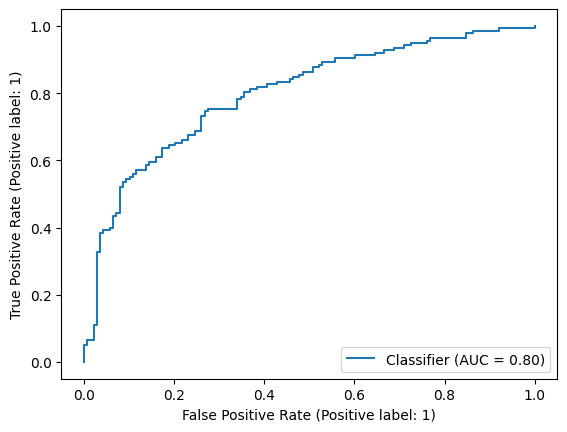

In [44]:


y_pred_proba = svm_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.3f' % auc)
from sklearn.metrics import RocCurveDisplay
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

